### **The Forward Heat Equation and its Solution**

$$
u(t,x) = x^2 + t.
$$

$$
u(0,x) = x^2
$$

$$
\partial_t u(t,x) = 1
$$

$$
\frac{1}{2} \frac{\partial^2 u(t,x)}{\partial x^2} = 1
$$

$$
\Rightarrow \quad \partial_t u = \frac{1}{2} \Delta u
$$



The required oracles for this problem.

In [ ]:
def u_t_x(t, x):
    """
    Returns the value of the function u(t, x) = x^2 + t.
    """
    return x**2 + t

def u_0_x(x):
    """
    Returns the value of the initial condition u(0, x) = x^2.
    """
    return x**2

Sampling points x using the uniform distribution for a fixed t and printing certain samples.

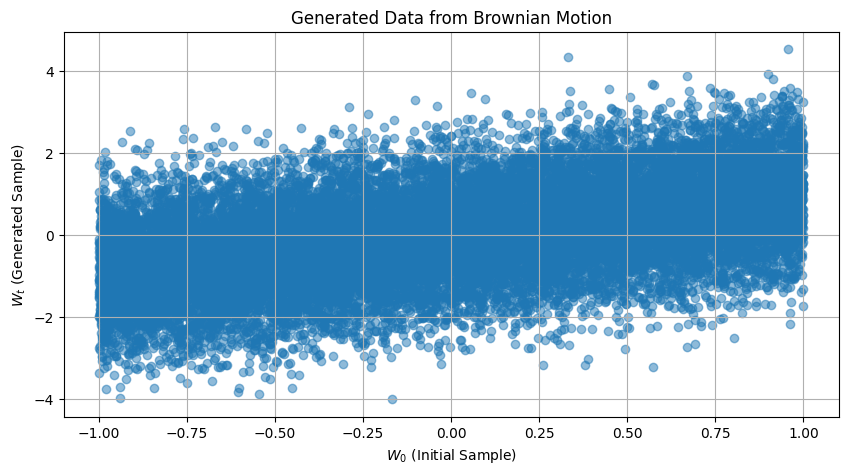

Sample 1: W0 = 0.5624, Wt = 0.3452
Sample 2: W0 = 0.1056, Wt = -1.0307
Sample 3: W0 = -0.7928, Wt = -0.1715
Sample 4: W0 = 0.3151, Wt = 1.0697
Sample 5: W0 = -0.3827, Wt = -1.8311


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N = 20000  # Number of samples
t = 1.0   # Time step
a, b = -1, 1  # Bounds for uniform distribution

# Step 1: Sample W0 from a uniform distribution
W0 = np.random.uniform(a, b, N)

# Step 2: Generate Wt using Brownian motion property
Wt = W0 + np.random.normal(0, np.sqrt(t), N)

# Visualizing the results
plt.figure(figsize=(10, 5))
plt.scatter(W0, Wt, alpha=0.5)
plt.xlabel(r'$W_0$ (Initial Sample)')
plt.ylabel(r'$W_t$ (Generated Sample)')
plt.title('Generated Data from Brownian Motion')
plt.grid(True)
plt.show()

# Print some samples
for i in range(5):
    print(f"Sample {i+1}: W0 = {W0[i]:.4f}, Wt = {Wt[i]:.4f}")



Plotting a histrogram of f(x) with the sampled points.

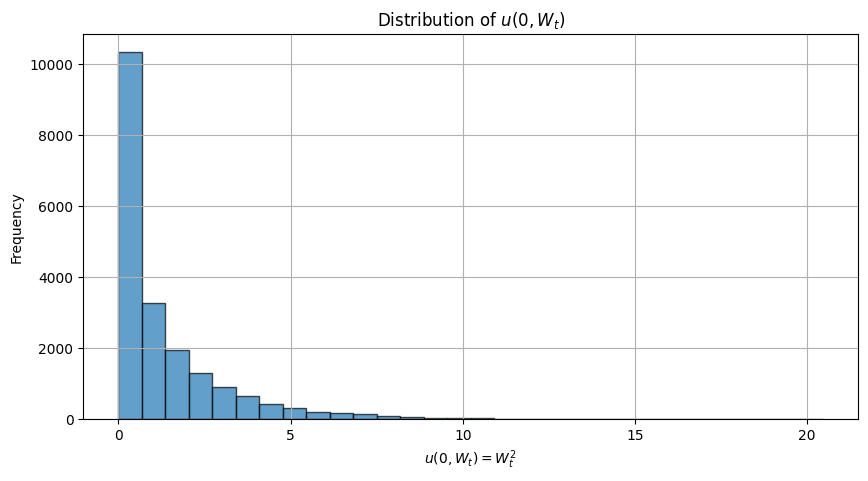

Sample 1: Wt = 0.3452, u(0, Wt) = 0.1191
Sample 2: Wt = -1.0307, u(0, Wt) = 1.0623
Sample 3: Wt = -0.1715, u(0, Wt) = 0.0294
Sample 4: Wt = 1.0697, u(0, Wt) = 1.1443
Sample 5: Wt = -1.8311, u(0, Wt) = 3.3529


In [ ]:
# Compute u(0, Wt) for each realization of Wt using the function
u_0_Wt = u_0_x(Wt)  # Call the function

# Visualizing the results
plt.figure(figsize=(10, 5))
plt.hist(u_0_Wt, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel(r'$u(0, W_t) = W_t^2$')
plt.ylabel('Frequency')
plt.title('Distribution of $u(0, W_t)$')
plt.grid(True)
plt.show()

# Print some computed values
for i in range(5):
    print(f"Sample {i+1}: Wt = {Wt[i]:.4f}, u(0, Wt) = {u_0_Wt[i]:.4f}")

The following code block defines the neural letwork, trains it, prints the loss over training epochs and plots the predicted function of the neural network along with some other plots.

Epoch 0/50000, Loss: 5.412054
Epoch 100/50000, Loss: 3.322134
Epoch 200/50000, Loss: 3.256751
Epoch 300/50000, Loss: 3.360586
Epoch 400/50000, Loss: 3.220866
Epoch 500/50000, Loss: 3.213834
Epoch 600/50000, Loss: 3.254702
Epoch 700/50000, Loss: 3.174093
Epoch 800/50000, Loss: 3.359487
Epoch 900/50000, Loss: 3.190420
Epoch 1000/50000, Loss: 3.251693
Epoch 1100/50000, Loss: 3.227715
Epoch 1200/50000, Loss: 3.209557
Epoch 1300/50000, Loss: 3.190140
Epoch 1400/50000, Loss: 3.162113
Epoch 1500/50000, Loss: 3.257589
Epoch 1600/50000, Loss: 3.208073
Epoch 1700/50000, Loss: 3.205642
Epoch 1800/50000, Loss: 3.236654
Epoch 1900/50000, Loss: 3.177295
Epoch 2000/50000, Loss: 3.305828
Epoch 2100/50000, Loss: 3.370067
Epoch 2200/50000, Loss: 3.215512
Epoch 2300/50000, Loss: 3.169340
Epoch 2400/50000, Loss: 3.201536
Epoch 2500/50000, Loss: 3.252359
Epoch 2600/50000, Loss: 3.238461
Epoch 2700/50000, Loss: 3.226971
Epoch 2800/50000, Loss: 3.210634
Epoch 2900/50000, Loss: 3.195834
Epoch 3000/50000, Loss

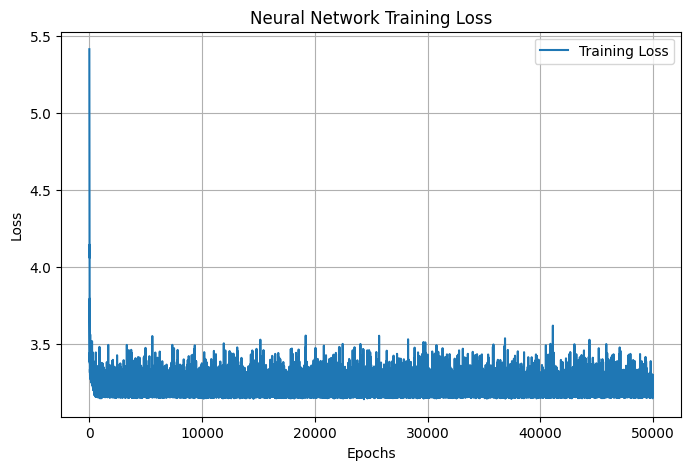

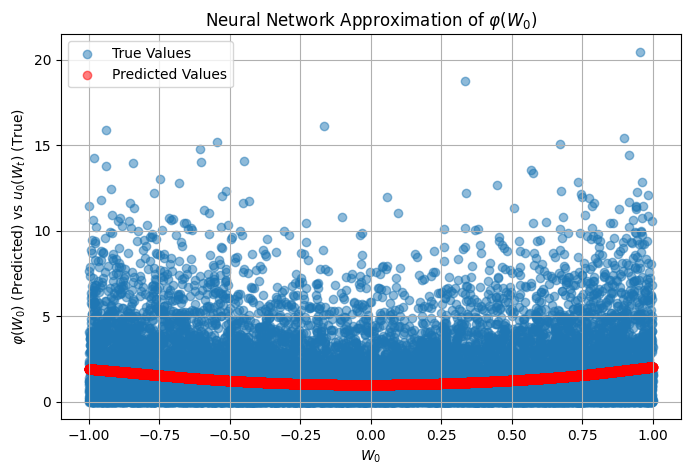

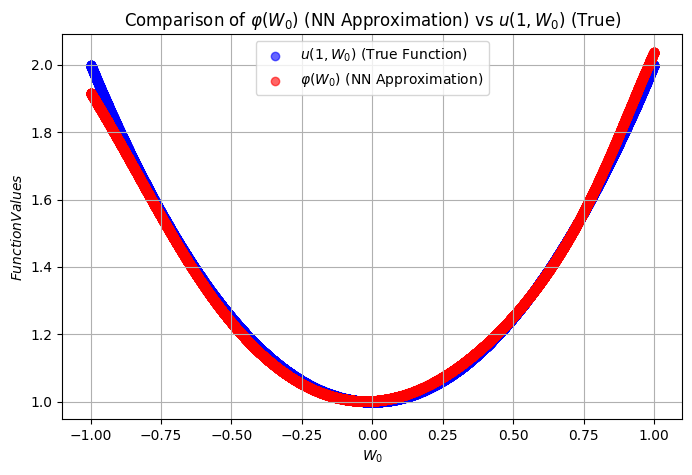

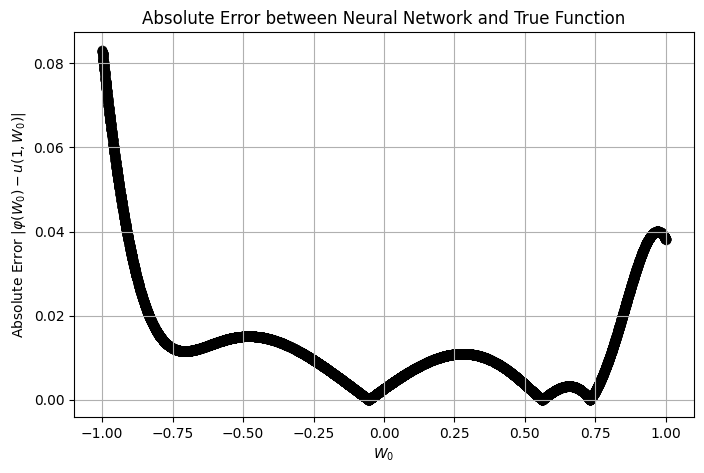

Sample 1: W0 = 0.5624, u(1, W0) = 1.3163, φ(W0) = 1.3163, Error = 0.0001
Sample 2: W0 = 0.1056, u(1, W0) = 1.0112, φ(W0) = 1.0184, Error = 0.0073
Sample 3: W0 = -0.7928, u(1, W0) = 1.6285, φ(W0) = 1.6136, Error = 0.0149
Sample 4: W0 = 0.3151, u(1, W0) = 1.0993, φ(W0) = 1.1100, Error = 0.0108
Sample 5: W0 = -0.3827, u(1, W0) = 1.1465, φ(W0) = 1.1325, Error = 0.0140


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Convert data to PyTorch tensors
W0_tensor = torch.tensor(W0, dtype=torch.float32).view(-1, 1)  # Input: W0
u_0_Wt_tensor = torch.tensor(u_0_Wt, dtype=torch.float32).view(-1, 1)  # Target: u(0, Wt)

# Define a simple feedforward neural network for φ(W0)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),  # Input layer (1 feature: W0)
            nn.Tanh(),         # Activation
            nn.Linear(64, 32), # Hidden layer
            nn.Tanh(),         # Activation
            nn.Linear(32, 32), # Hidden layer
            nn.Tanh(),
            nn.Linear(32, 1)   # Output layer (1 output: φ(W0))
        )

    def forward(self, x):
        return self.model(x)

# Initialize the network, loss function, and optimizer
phi_model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model.parameters(), lr=0.00001)

# Convert data into PyTorch Dataset
batch_size = 512  # You can try 32, 64, or 128
dataset = TensorDataset(W0_tensor, u_0_Wt_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training Loop with Mini-Batch Optimization
epochs = 50000
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0  # Track total loss per epoch

    for batch in train_loader:  # Iterate over mini-batches
        W0_batch, u_0_Wt_batch = batch  # Extract mini-batch data

        optimizer.zero_grad()  # Clear previous gradients
        predictions = phi_model(W0_batch)  # Forward pass
        loss = criterion(predictions, u_0_Wt_batch)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        epoch_loss += loss.item()  # Accumulate batch losses

    # Store the average loss per epoch
    loss_history.append(epoch_loss / len(train_loader))

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss_history[-1]:.6f}")

# Plot loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Training Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot true values vs predicted values
with torch.no_grad():
    predictions = phi_model(W0_tensor).numpy()

plt.figure(figsize=(8, 5))
plt.scatter(W0, u_0_Wt, alpha=0.5, label="True Values")
plt.scatter(W0, predictions, alpha=0.5, label="Predicted Values", color='red')
plt.xlabel(r"$W_0$")
plt.ylabel(r"$\varphi(W_0)$ (Predicted) vs $u_0(W_t)$ (True)")
plt.legend()
plt.title("Neural Network Approximation of $\\varphi(W_0)$")
plt.grid(True)
plt.show()


# Compute u(1, W0)
t = 1  # Given t = 1
u_t_W0 = u_t_x(t, W0)  # Compute exact values

# Get neural network predictions φ(W0)
with torch.no_grad():
    phi_W0 = phi_model(W0_tensor).numpy().flatten()  # Neural network predictions

# Compute absolute error
error = np.abs(phi_W0 - u_t_W0)

# Plot φ(W0) vs u(1, W0)
plt.figure(figsize=(8, 5))
plt.scatter(W0, u_t_W0, label=r'$u(1, W_0)$ (True Function)', alpha=0.6, color='blue')
plt.scatter(W0, phi_W0, label=r'$\varphi(W_0)$ (NN Approximation)', alpha=0.6, color='red')
plt.xlabel(r"$W_0$")
plt.ylabel(r"$Function Values$")
plt.legend()
plt.title(r"Comparison of $\varphi(W_0)$ (NN Approximation) vs $u(1, W_0)$ (True)")
plt.grid(True)
plt.show()

# Plot absolute error
plt.figure(figsize=(8, 5))
plt.scatter(W0, error, alpha=0.6, color='black')
plt.xlabel(r"$W_0$")
plt.ylabel(r"Absolute Error $|\varphi(W_0) - u(1, W_0)|$")
plt.title("Absolute Error between Neural Network and True Function")
plt.grid(True)
plt.show()

# Print sample comparison
for i in range(5):
    print(f"Sample {i+1}: W0 = {W0[i]:.4f}, u(1, W0) = {u_t_W0[i]:.4f}, φ(W0) = {phi_W0[i]:.4f}, Error = {error[i]:.4f}")


The following code plots some of the plots plotted above.

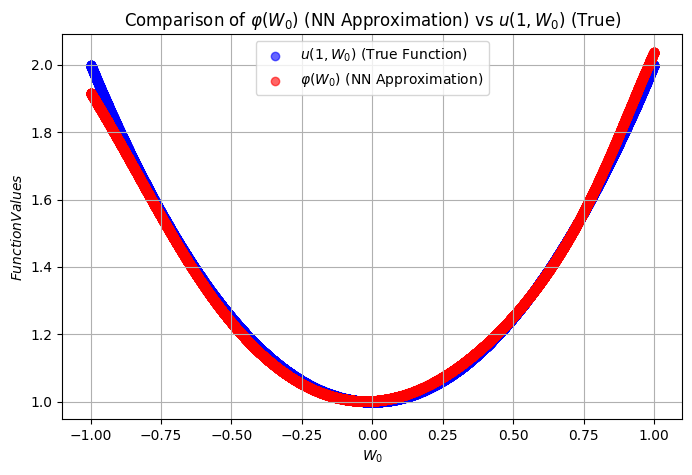

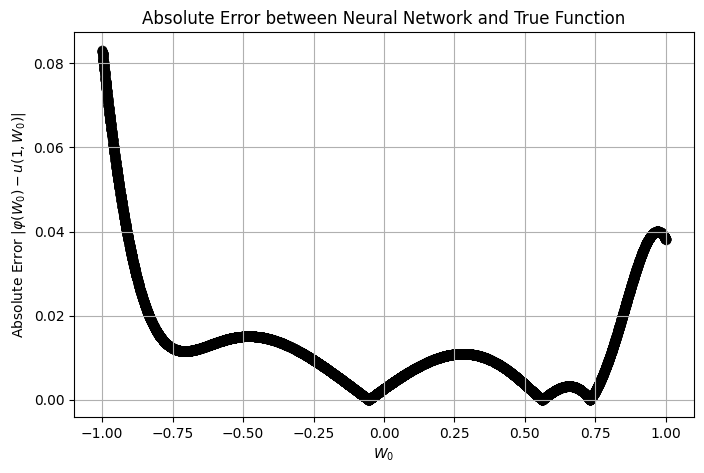

Sample 1: W0 = 0.5624, u(1, W0) = 1.3163, φ(W0) = 1.3163, Error = 0.0001
Sample 2: W0 = 0.1056, u(1, W0) = 1.0112, φ(W0) = 1.0184, Error = 0.0073
Sample 3: W0 = -0.7928, u(1, W0) = 1.6285, φ(W0) = 1.6136, Error = 0.0149
Sample 4: W0 = 0.3151, u(1, W0) = 1.0993, φ(W0) = 1.1100, Error = 0.0108
Sample 5: W0 = -0.3827, u(1, W0) = 1.1465, φ(W0) = 1.1325, Error = 0.0140


In [ ]:
# Compute u(1, W0)
t = 1  # Given t = 1
u_t_W0 = u_t_x(t, W0)  # Compute exact values

# Get neural network predictions φ(W0)
with torch.no_grad():
    phi_W0 = phi_model(W0_tensor).numpy().flatten()  # Neural network predictions

# Compute absolute error
error = np.abs(phi_W0 - u_t_W0)

# Plot φ(W0) vs u(1, W0)
plt.figure(figsize=(8, 5))
plt.scatter(W0, u_t_W0, label=r'$u(1, W_0)$ (True Function)', alpha=0.6, color='blue')
plt.scatter(W0, phi_W0, label=r'$\varphi(W_0)$ (NN Approximation)', alpha=0.6, color='red')
plt.xlabel(r"$W_0$")
plt.ylabel(r"$Function Values$")
plt.legend()
plt.title(r"Comparison of $\varphi(W_0)$ (NN Approximation) vs $u(1, W_0)$ (True)")
plt.grid(True)
plt.show()

# Plot absolute error
plt.figure(figsize=(8, 5))
plt.scatter(W0, error, alpha=0.6, color='black')
plt.xlabel(r"$W_0$")
plt.ylabel(r"Absolute Error $|\varphi(W_0) - u(1, W_0)|$")
plt.title("Absolute Error between Neural Network and True Function")
plt.grid(True)
plt.show()

# Print sample comparison
for i in range(5):
    print(f"Sample {i+1}: W0 = {W0[i]:.4f}, u(1, W0) = {u_t_W0[i]:.4f}, φ(W0) = {phi_W0[i]:.4f}, Error = {error[i]:.4f}")

We are now going to deploy our model to model the price of an European call option using the Black-Scholes PDE. As discussed in the report, the Black-Scholes PDE is a particular case of linear parabolic PDEs and therefore by changing the parameteres defined at the start of the model, we can ensure that the neural network learns the solution of any other linear parabolic PDE.

The necessary imports


In [ ]:
# Essential imports
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as st


The required parameters defining the PDE as well as those defining the values to be sampled.

In [ ]:
# Simulation parameters
N = 20000         # Monte Carlo samples
r = 0.1          # Risk-free rate
sigma = 0.2       # Volatility
T = 5.0           # Maturity
K = 2.0           # Strike
x_min, x_max = 0.1, 5.5  # Range of X0

# Time discretization for Euler–Maruyama
M = 1000
dt = T / M

# Seed for reproducibility
np.random.seed(123)


Generate Training Data via the Euler-Maruyama scheme.

In [ ]:
# Step 3.1: Sample initial values X_0
X0_array = np.random.uniform(low=x_min, high=x_max, size=N)

# Step 3.2: Euler–Maruyama approximation of X_T
X_T_array = X0_array.copy()
for _ in range(M):
    dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)
    X_T_array += r * X_T_array * dt + sigma * X_T_array * dW

# Step 3.3: Discounted payoff for European call
payoff = np.maximum(X_T_array - K, 0.0)
discounted_payoff = np.exp(-r * T) * payoff


Visulasize the generated values

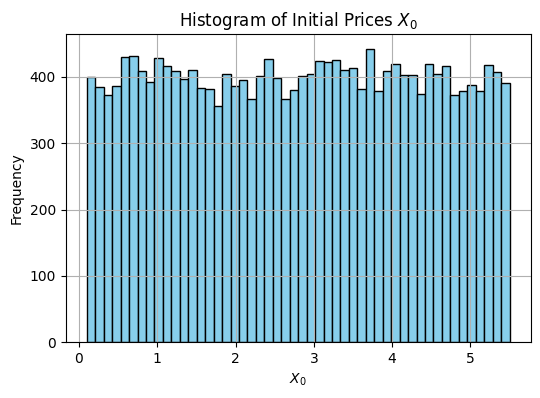

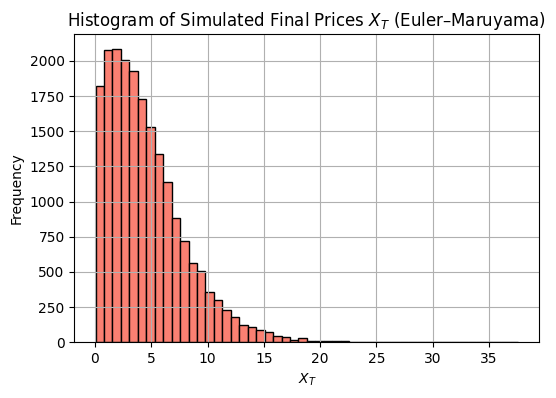

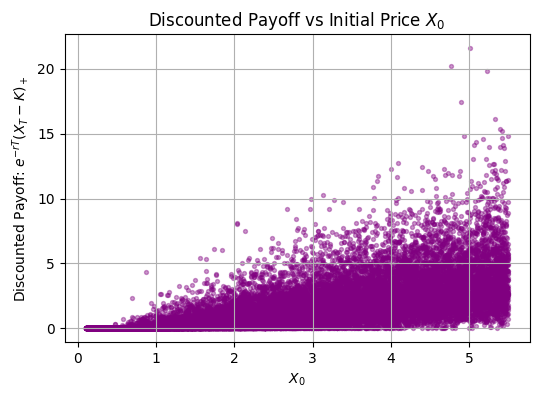

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(X0_array, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Initial Prices $X_0$")
plt.xlabel("$X_0$")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(X_T_array, bins=50, color='salmon', edgecolor='black')
plt.title("Histogram of Simulated Final Prices $X_T$ (Euler–Maruyama)")
plt.xlabel("$X_T$")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X0_array, discounted_payoff, alpha=0.4, s=8, color='purple')
plt.title("Discounted Payoff vs Initial Price $X_0$")
plt.xlabel("$X_0$")
plt.ylabel("Discounted Payoff: $e^{-rT}(X_T - K)_+$")
plt.grid(True)
plt.show()


Convert the generated values to Pytorch tensors which will then be passed as the training data of the neural network.

In [ ]:
# Prepare PyTorch dataset
X0_tensor = torch.tensor(X0_array, dtype=torch.float32).view(-1, 1)
y_tensor  = torch.tensor(discounted_payoff, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X0_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=256, shuffle=True)


Define the neural network.

In [ ]:
# Neural network model definition
class BlackScholesNet(nn.Module):
    def __init__(self):
        super(BlackScholesNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )
    def forward(self, x):
        return self.model(x)

# Model, loss and optimizer
phi_model = BlackScholesNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model.parameters(), lr=0.00001)


Train the network and output the loss over epochs.



In [ ]:
# Training loop
epochs = 5000
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for X0_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = phi_model(X0_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")


Epoch 100/5000, Loss = 2.470515
Epoch 200/5000, Loss = 2.195601
Epoch 300/5000, Loss = 2.203067
Epoch 400/5000, Loss = 2.159519
Epoch 500/5000, Loss = 2.165470
Epoch 600/5000, Loss = 2.168724
Epoch 700/5000, Loss = 2.169225
Epoch 800/5000, Loss = 2.158458
Epoch 900/5000, Loss = 2.157267
Epoch 1000/5000, Loss = 2.149911
Epoch 1100/5000, Loss = 2.157069
Epoch 1200/5000, Loss = 2.161307
Epoch 1300/5000, Loss = 2.161029
Epoch 1400/5000, Loss = 2.161574
Epoch 1500/5000, Loss = 2.160934
Epoch 1600/5000, Loss = 2.151678
Epoch 1700/5000, Loss = 2.188524
Epoch 1800/5000, Loss = 2.146923
Epoch 1900/5000, Loss = 2.159429
Epoch 2000/5000, Loss = 2.165762
Epoch 2100/5000, Loss = 2.152159
Epoch 2200/5000, Loss = 2.159747
Epoch 2300/5000, Loss = 2.163025
Epoch 2400/5000, Loss = 2.161556
Epoch 2500/5000, Loss = 2.172982
Epoch 2600/5000, Loss = 2.150647
Epoch 2700/5000, Loss = 2.160850
Epoch 2800/5000, Loss = 2.159023
Epoch 2900/5000, Loss = 2.152973
Epoch 3000/5000, Loss = 2.172752
Epoch 3100/5000, Lo

Plot the loss function over epochs.

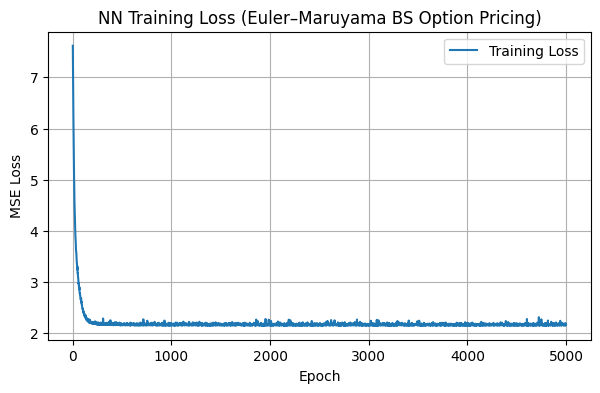

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("NN Training Loss (Euler–Maruyama BS Option Pricing)")
plt.grid(True)
plt.legend()
plt.show()


Compare the solution obtained by the neural network with the closed-form solution of an European call option.

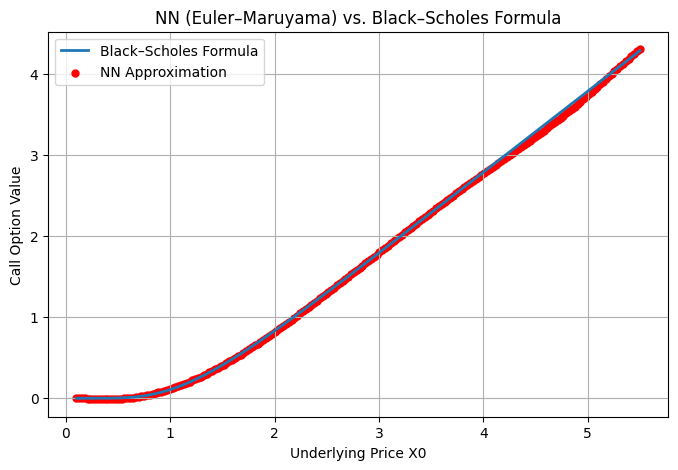

In [ ]:
# Black–Scholes closed-form for comparison
def black_scholes_call(x, K, r, sigma, T):
    if T <= 0 or x <= 0:
        return max(x - K, 0.0)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return x * st.norm.cdf(d1) - K * np.exp(-r * T) * st.norm.cdf(d2)

# Build grid and predict
test_grid = np.linspace(x_min, x_max, 200)
phi_model.eval()
with torch.no_grad():
    nn_preds = phi_model(torch.tensor(test_grid, dtype=torch.float32).view(-1,1))
    nn_preds = nn_preds.numpy().flatten()

bs_prices = np.array([black_scholes_call(x, K, r, sigma, T) for x in test_grid])

# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(test_grid, bs_prices, label="Black–Scholes Formula", linewidth=2)
plt.scatter(test_grid, nn_preds, color="red", s=25, label="NN Approximation")
plt.xlabel("Underlying Price X0")
plt.ylabel("Call Option Value")
plt.title("NN (Euler–Maruyama) vs. Black–Scholes Formula")
plt.grid(True)
plt.legend()
plt.show()


Print the errors

In [ ]:
errors = np.abs(nn_preds - bs_prices)
print(f"Mean Absolute Error : {np.mean(errors):.6f}")
print(f"Max Absolute Error  : {np.max(errors):.6f}")


Mean Absolute Error : 0.015906
Max Absolute Error  : 0.069037


The implementation above calculated the price of the call option at time t = 0, the following code does it for any fixed time t such that 0 <= t <= T.

Epoch 500/5000, Loss = 0.015047
Epoch 1000/5000, Loss = 0.015669
Epoch 1500/5000, Loss = 0.014994
Epoch 2000/5000, Loss = 0.015023
Epoch 2500/5000, Loss = 0.015007
Epoch 3000/5000, Loss = 0.015116
Epoch 3500/5000, Loss = 0.014978
Epoch 4000/5000, Loss = 0.014965
Epoch 4500/5000, Loss = 0.015012
Epoch 5000/5000, Loss = 0.014839


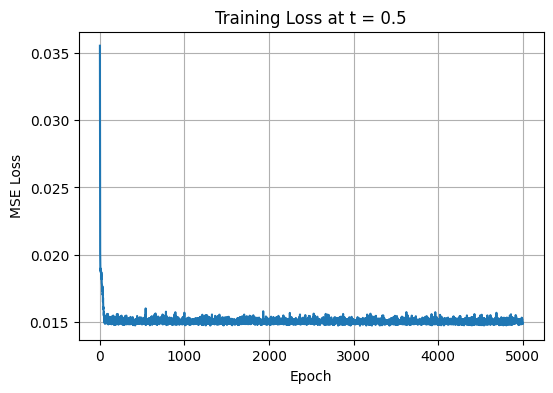

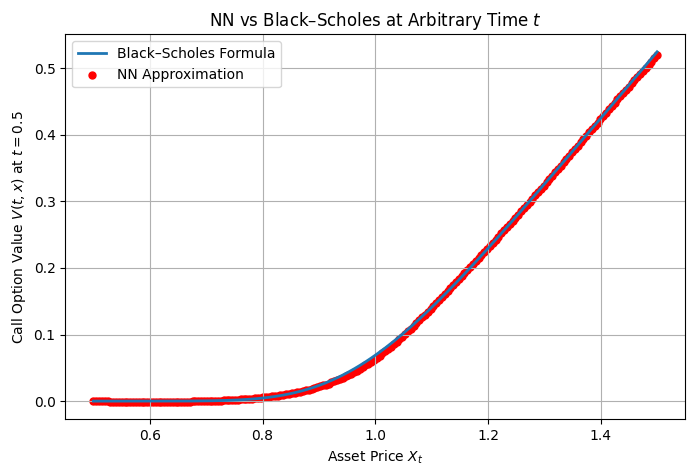

Mean Absolute Error : 0.001482
Max Absolute Error  : 0.005502


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as st

# Parameters
N = 20000
r = 0.05
sigma = 0.2
T = 1.0
K = 1.0
x_min, x_max = 0.5, 1.5

# Target evaluation time t in [0, T)
t = 0.5
assert 0 <= t < T

# Time discretization from t to T
M = 100
dt = (T - t) / M
np.random.seed(123)

# Step 1: Sample X_t
Xt_array = np.random.uniform(low=x_min, high=x_max, size=N)

# Step 2: Simulate X_T using Euler–Maruyama from t to T
X_T_array = Xt_array.copy()
for _ in range(M):
    dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)
    X_T_array += r * X_T_array * dt + sigma * X_T_array * dW

# Step 3: Compute discounted payoff
payoff = np.maximum(X_T_array - K, 0.0)
discounted_payoff = np.exp(-r * (T - t)) * payoff

# Convert to PyTorch tensors
Xt_tensor = torch.tensor(Xt_array, dtype=torch.float32).view(-1, 1)
y_tensor  = torch.tensor(discounted_payoff, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(Xt_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)

# Define neural network
class BlackScholesNet(nn.Module):
    def __init__(self):
        super(BlackScholesNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )
    def forward(self, x):
        return self.model(x)

phi_model = BlackScholesNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model.parameters(), lr=1e-4)

# Train the network
epochs = 5000
loss_history = []
for epoch in range(epochs):
    epoch_loss = 0.0
    for Xt_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = phi_model(Xt_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")

# Plot training loss
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title(f"Training Loss at t = {t}")
plt.grid(True)
plt.show()

# Compare to closed-form Black–Scholes formula
def black_scholes_call(x, K, r, sigma, T_minus_t):
    if T_minus_t <= 0 or x <= 0:
        return max(x - K, 0.0)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * T_minus_t) / (sigma * np.sqrt(T_minus_t))
    d2 = d1 - sigma * np.sqrt(T_minus_t)
    return x * st.norm.cdf(d1) - K * np.exp(-r * T_minus_t) * st.norm.cdf(d2)

test_grid = np.linspace(x_min, x_max, 200)
phi_model.eval()
with torch.no_grad():
    nn_preds = phi_model(torch.tensor(test_grid, dtype=torch.float32).view(-1,1)).numpy().flatten()

bs_prices = np.array([black_scholes_call(x, K, r, sigma, T - t) for x in test_grid])

plt.figure(figsize=(8,5))
plt.plot(test_grid, bs_prices, label="Black–Scholes Formula", linewidth=2)
plt.scatter(test_grid, nn_preds, color="red", s=25, label="NN Approximation")
plt.xlabel("Asset Price $X_t$")
plt.ylabel(f"Call Option Value $V(t, x)$ at $t = {t}$")
plt.title("NN vs Black–Scholes at Arbitrary Time $t$")
plt.legend()
plt.grid(True)
plt.show()

# Print error statistics
errors = np.abs(nn_preds - bs_prices)
print(f"Mean Absolute Error : {np.mean(errors):.6f}")
print(f"Max Absolute Error  : {np.max(errors):.6f}")


We are now aiming to do the same as the implementation above without using the Euler-Maruyama scheme but instead simulating the proce of the call option using the explicit closed-form solution.

Epoch 500/5000, Loss = 0.015111
Epoch 1000/5000, Loss = 0.015060
Epoch 1500/5000, Loss = 0.015364
Epoch 2000/5000, Loss = 0.015217
Epoch 2500/5000, Loss = 0.015004
Epoch 3000/5000, Loss = 0.015717
Epoch 3500/5000, Loss = 0.015018
Epoch 4000/5000, Loss = 0.015267
Epoch 4500/5000, Loss = 0.015035
Epoch 5000/5000, Loss = 0.015093


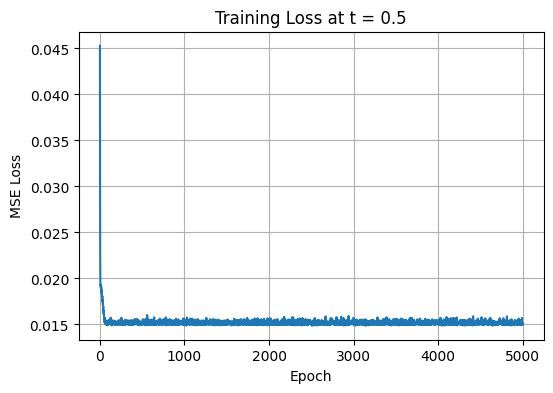

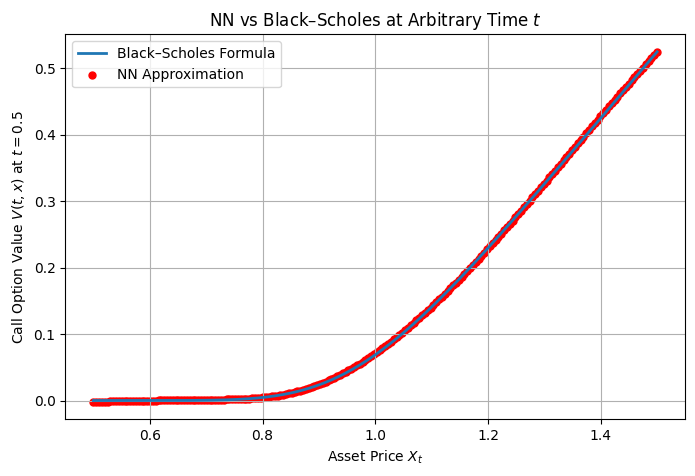

Mean Absolute Error : 0.001085
Max Absolute Error  : 0.003068


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as st

# ----------------------------
# PARAMETERS
# ----------------------------
N = 20000           # Number of samples
r = 0.05            # Risk-free rate
sigma = 0.2         # Volatility
T = 1.0             # Maturity
K = 1.0             # Strike
x_min, x_max = 0.5, 1.5  # Range for X_t

t = 0.5             # Evaluation time (0 <= t < T)
assert 0 <= t < T

np.random.seed(123)

# ----------------------------
# STEP 1: SAMPLE X_t UNIFORMLY
# ----------------------------
Xt_array = np.random.uniform(low=x_min, high=x_max, size=N)

# ----------------------------
# STEP 2: USE CLOSED-FORM TO COMPUTE X_T GIVEN X_t
# ----------------------------
Z = np.random.normal(0.0, 1.0, size=N)  # Brownian increments
X_T_array = Xt_array * np.exp(
    sigma * np.sqrt(T - t) * Z + (r - 0.5 * sigma**2) * (T - t)
)

# ----------------------------
# STEP 3: DISCOUNTED PAYOFF
# ----------------------------
payoff = np.maximum(X_T_array - K, 0.0)
discounted_payoff = np.exp(-r * (T - t)) * payoff

# ----------------------------
# STEP 4: PREPARE DATA FOR TRAINING
# ----------------------------
Xt_tensor = torch.tensor(Xt_array, dtype=torch.float32).view(-1, 1)
y_tensor  = torch.tensor(discounted_payoff, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(Xt_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)

# ----------------------------
# STEP 5: DEFINE NEURAL NETWORK φ(x)
# ----------------------------
class BlackScholesNet(nn.Module):
    def __init__(self):
        super(BlackScholesNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

phi_model = BlackScholesNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model.parameters(), lr=1e-4)

# ----------------------------
# STEP 6: TRAINING LOOP
# ----------------------------
epochs = 5000
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for Xt_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = phi_model(Xt_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")

# ----------------------------
# STEP 7: PLOT TRAINING LOSS
# ----------------------------
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title(f"Training Loss at t = {t}")
plt.grid(True)
plt.show()

# ----------------------------
# STEP 8: COMPARE TO BLACK–SCHOLES FORMULA
# ----------------------------
def black_scholes_call(x, K, r, sigma, T_minus_t):
    if T_minus_t <= 0 or x <= 0:
        return max(x - K, 0.0)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * T_minus_t) / (sigma * np.sqrt(T_minus_t))
    d2 = d1 - sigma * np.sqrt(T_minus_t)
    return x * st.norm.cdf(d1) - K * np.exp(-r * T_minus_t) * st.norm.cdf(d2)

test_grid = np.linspace(x_min, x_max, 200)
phi_model.eval()
with torch.no_grad():
    nn_preds = phi_model(torch.tensor(test_grid, dtype=torch.float32).view(-1,1)).numpy().flatten()

bs_prices = np.array([black_scholes_call(x, K, r, sigma, T - t) for x in test_grid])

plt.figure(figsize=(8,5))
plt.plot(test_grid, bs_prices, label="Black–Scholes Formula", linewidth=2)
plt.scatter(test_grid, nn_preds, color="red", s=25, label="NN Approximation")
plt.xlabel("Asset Price $X_t$")
plt.ylabel(f"Call Option Value $V(t, x)$ at $t = {t}$")
plt.title("NN vs Black–Scholes at Arbitrary Time $t$")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# STEP 9: ERROR REPORTING
# ----------------------------
errors = np.abs(nn_preds - bs_prices)
print(f"Mean Absolute Error : {np.mean(errors):.6f}")
print(f"Max Absolute Error  : {np.max(errors):.6f}")


## 2D Neural Network for Learning the Full Black–Scholes Solution Surface

We now aim to train a **2D neural network** that learns the entire solution surface of the Black–Scholes PDE:

$$
V(t, x) \approx \varphi_\theta(t, x)
$$

### Neural Network Setup

- **Inputs to the Neural Network**:  
  Pairs \((t, x)\) — representing time and asset price.

- **Output of the Neural Network**:  
  The value function \(V(t, x)\), defined via the Feynman–Kac representation:

$$
V(t, x) = \mathbb{E}^{\mathbb{Q}} \left[ e^{-r(T - t)} \cdot f(X_T) \mid X_t = x \right]
$$

Here:

- $X_t$ is the underlying asset price modeled as a stochastic process  
- $f(X_T)$ is the terminal payoff at maturity $T$  
- $r$ is the risk-free interest rate  
- $\mathbb{Q}$ denotes the risk-neutral probability measure

We approximate the conditional expectation using the **Euler–Maruyama discretization** of the stochastic differential equation (SDE) governing $X_t$, starting from any initial time $t$ up to the maturity $T$.


## Neural Network that Learns the Mapping $(t, x) \mapsto V(t, x)$

We aim to train a neural network that approximates the full solution surface of the Black–Scholes partial differential equation by learning the mapping:

$$
(t, x) \mapsto V(t, x)
$$

That is, the network takes a pair $(t, x)$ as input and returns an approximation of the value function $V(t, x)$ as output.

In contrast to the previous implementation, where the time variable $t$ was held fixed and the network learned the value function only as a function of the asset price $x$, we now allow $t$ to vary. This enables the network to learn the **entire surface** $V(t, x)$, capturing the dynamic evolution of option prices across both time and space. As a result, the network approximates not just a one-dimensional slice but the full two-dimensional structure of the solution.


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as st

# Parameters
N = 50000
r = 0.05
sigma = 0.2
T = 1.0
K = 1.0
x_min, x_max = 0.5, 1.5
M = 1000  # steps for Euler–Maruyama
np.random.seed(123)

# Step 1: Sample (t, x) pairs
t_array = np.random.uniform(0.0, T, size=N)
x_array = np.random.uniform(x_min, x_max, size=N)
dt_array = (T - t_array) / M

# Step 2: Euler–Maruyama from (t, x) to T
X_T_array = x_array.copy()
for i in range(M):
    dW = np.random.normal(0.0, 1.0, size=N)
    X_T_array += r * X_T_array * dt_array + sigma * X_T_array * np.sqrt(dt_array) * dW

# Step 3: Compute discounted payoff
payoff = np.maximum(X_T_array - K, 0.0)
discounted_payoff = np.exp(-r * (T - t_array)) * payoff

# Step 4: PyTorch tensors (input = [t, x], output = discounted payoff)
tx_tensor = torch.tensor(np.stack([t_array, x_array], axis=1), dtype=torch.float32)
y_tensor = torch.tensor(discounted_payoff, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(tx_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)


In [ ]:
class BlackScholesSurfaceNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )
    def forward(self, input):
        return self.model(input)

phi_model_2d = BlackScholesSurfaceNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model_2d.parameters(), lr=0.00001)


Training loop

In [ ]:
epochs = 10000
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch in train_loader:
        tx_batch, y_batch = batch
        optimizer.zero_grad()
        predictions = phi_model_2d(tx_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")


Plot training loss

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss for Full BS Surface $V(t,x)$")
plt.grid(True)
plt.show()


## Evaluate and Visualize the Surface

Let’s visualize the value function $V(t, x)$ for a fixed value of $t$ and varying $x$:

$$
x \mapsto V(t, x) \quad \text{(with fixed } t\text{)}
$$

This helps us examine 1D slices of the solution surface and understand how the option value evolves with respect to the asset price $x$ at specific time snapshots.


In [ ]:
# Choose time t0 to visualize a slice V(t0, x)
t0 = 0.5
x_grid = np.linspace(x_min, x_max, 200)
tx_input = torch.tensor(np.column_stack([np.full_like(x_grid, t0), x_grid]), dtype=torch.float32)

phi_model_2d.eval()
with torch.no_grad():
    nn_vals = phi_model(tx_input).numpy().flatten()

# Closed-form comparison
def black_scholes_call(x, K, r, sigma, T_minus_t):
    if T_minus_t <= 0 or x <= 0:
        return max(x - K, 0.0)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * T_minus_t) / (sigma * np.sqrt(T_minus_t))
    d2 = d1 - sigma * np.sqrt(T_minus_t)
    return x * st.norm.cdf(d1) - K * np.exp(-r * T_minus_t) * st.norm.cdf(d2)

bs_vals = np.array([black_scholes_call(x, K, r, sigma, T - t0) for x in x_grid])

plt.figure(figsize=(8,5))
plt.plot(x_grid, bs_vals, label="Black–Scholes (exact)", linewidth=2)
plt.scatter(x_grid, nn_vals, color='red', s=25, label="NN Approximation")
plt.xlabel("Asset Price $x$")
plt.ylabel(f"Option Value $V(t={t0}, x)$")
plt.title(f"Black–Scholes Surface Slice at t = {t0}")
plt.legend()
plt.grid(True)
plt.show()


## Plot the True Neural Network Output and Error

We now plot the neural network's predicted surface $V(t, x)$ and compare it to the exact Black–Scholes solution.

This includes:

- A visualization of the learned surface:
  $$
  (t, x) \mapsto V(t, x)
  $$

- An error plot showing the difference between the neural network approximation and the analytical Black–Scholes solution:
  $$
  \text{Error}(t, x) = \left| V_{\text{NN}}(t, x) - V_{\text{BS}}(t, x) \right|
  $$

These visualizations help assess how well the neural network captures the structure of the true solution surface.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st

# --- Assumed to already be defined:
# r, sigma, T, K, x_min, x_max, phi_model (trained neural network)

# --- Black–Scholes closed-form
def black_scholes_call(x, K, r, sigma, tau):
    x = np.maximum(x, 1e-10)
    tau = np.maximum(tau, 1e-10)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return x * st.norm.cdf(d1) - K * np.exp(-r * tau) * st.norm.cdf(d2)

# --- Create grid of (t, x) values
t_vals = np.linspace(0.01, T, 30)
x_vals = np.linspace(x_min, x_max, 30)
T_grid, X_grid = np.meshgrid(t_vals, x_vals)

# --- Flatten and build input to NN: [t, x]
TX = np.stack([T_grid.ravel(), X_grid.ravel()], axis=1)
tx_tensor = torch.tensor(TX, dtype=torch.float32)

# --- Predict using trained NN
phi_model_2d.eval()
with torch.no_grad():
    nn_preds = phi_model(tx_tensor).numpy().flatten()

# --- Compute exact Black–Scholes prices
bs_prices = black_scholes_call(TX[:, 1], K, r, sigma, T - TX[:, 0])

# --- Reshape to 2D surfaces
nn_surface = nn_preds.reshape(len(x_vals), len(t_vals))
bs_surface = bs_prices.reshape(len(x_vals), len(t_vals))
error_surface = np.abs(nn_surface - bs_surface)


# --- FIRST FIGURE: NN + Black–Scholes side by side
fig = plt.figure(figsize=(14, 5))

# Plot 1: NN Approximation
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(T_grid, X_grid, nn_surface, cmap='viridis', edgecolor='none')
ax1.set_title("NN Approximation $V_{\\text{NN}}(t, x)$", fontsize=12)
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("Asset Price $x$")
ax1.set_zlabel("Option Price", labelpad=10)
cb1 = fig.colorbar(surf1, ax=ax1, pad=0.1)
cb1.set_label("Option Price", rotation=270, labelpad=15)

# Plot 2: Exact Black–Scholes
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(T_grid, X_grid, bs_surface, cmap='plasma', edgecolor='none')
ax2.set_title("Exact Black–Scholes $V_{\\text{BS}}(t, x)$", fontsize=12)
ax2.set_xlabel("Time $t$")
ax2.set_ylabel("Asset Price $x$")
ax2.set_zlabel("Option Price", labelpad=10)
cb2 = fig.colorbar(surf2, ax=ax2, pad=0.1)
cb2.set_label("Option Price", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# --- SECOND FIGURE: Error surface
fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')
surf3 = ax3.plot_surface(T_grid, X_grid, error_surface, cmap='inferno', edgecolor='none')
ax3.set_title("Absolute Error $|V_{\\text{NN}}(t, x) - V_{\\text{BS}}(t, x)|$", fontsize=12)
ax3.set_xlabel("Time $t$")
ax3.set_ylabel("Asset Price $x$")
ax3.set_zlabel("Error", labelpad=10)
cb3 = fig.colorbar(surf3, ax=ax3, shrink=0.6, pad=0.1)
cb3.set_label("Absolute Error", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


## Exact Simulation Instead of Euler–Maruyama

In this experiment, we repeat the entire procedure described above, but instead of using the Euler–Maruyama method to simulate the terminal asset value $X_T$, we use the **exact solution** of the Black–Scholes stochastic differential equation.

This means we generate $X_T$ directly using the analytical formula:

$$
X_T = X_t \cdot \exp\left( \left(r - \frac{1}{2} \sigma^2\right)(T - t) + \sigma \sqrt{T - t} \cdot Z \right), \quad Z \sim \mathcal{N}(0, 1)
$$

Using this exact simulation provides a more accurate estimation of the conditional expectation in the Feynman–Kac representation:

$$
V(t, x) = \mathbb{E}^{\mathbb{Q}} \left[ e^{-r(T - t)} f(X_T) \mid X_t = x \right]
$$

This approach eliminates numerical discretization error introduced by Euler–Maruyama.


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as st

# Parameters
N = 50000
r = 0.05
sigma = 0.2
T = 1.0
K = 1.0
x_min, x_max = 0.5, 1.5

np.random.seed(123)

# Step 1: Sample (t, x) pairs
t_array = np.random.uniform(0.0, T, size=N)
x_array = np.random.uniform(x_min, x_max, size=N)
tau_array = T - t_array  # time-to-maturity

# Step 2: Exact GBM solution for X_T given (t, x)
Z = np.random.normal(0.0, 1.0, size=N)
X_T_array = x_array * np.exp(
    sigma * np.sqrt(tau_array) * Z + (r - 0.5 * sigma**2) * tau_array
)

# Step 3: Compute discounted payoff
payoff = np.maximum(X_T_array - K, 0.0)
discounted_payoff = np.exp(-r * tau_array) * payoff

# Step 4: PyTorch tensors (input = [t, x], output = discounted payoff)
tx_tensor = torch.tensor(np.stack([t_array, x_array], axis=1), dtype=torch.float32)
y_tensor = torch.tensor(discounted_payoff, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(tx_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)


In [2]:
class BlackScholesSurfaceNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )
    def forward(self, input):
        return self.model(input)

phi_model_2d = BlackScholesSurfaceNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model_2d.parameters(), lr=0.00001)


epochs = 5000
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch in train_loader:
        tx_batch, y_batch = batch
        optimizer.zero_grad()
        predictions = phi_model_2d(tx_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")

Epoch 200/5000, Loss = 0.015289
Epoch 400/5000, Loss = 0.015088
Epoch 600/5000, Loss = 0.015089
Epoch 800/5000, Loss = 0.015069
Epoch 1000/5000, Loss = 0.015079
Epoch 1200/5000, Loss = 0.015054
Epoch 1400/5000, Loss = 0.015052
Epoch 1600/5000, Loss = 0.015079
Epoch 1800/5000, Loss = 0.015058
Epoch 2000/5000, Loss = 0.015055
Epoch 2200/5000, Loss = 0.015066
Epoch 2400/5000, Loss = 0.015062
Epoch 2600/5000, Loss = 0.015060
Epoch 2800/5000, Loss = 0.015047
Epoch 3000/5000, Loss = 0.015058
Epoch 3200/5000, Loss = 0.015050
Epoch 3400/5000, Loss = 0.015039
Epoch 3600/5000, Loss = 0.015058
Epoch 3800/5000, Loss = 0.015045
Epoch 4000/5000, Loss = 0.015042
Epoch 4200/5000, Loss = 0.015062
Epoch 4400/5000, Loss = 0.015053
Epoch 4600/5000, Loss = 0.015058
Epoch 4800/5000, Loss = 0.015032
Epoch 5000/5000, Loss = 0.015037


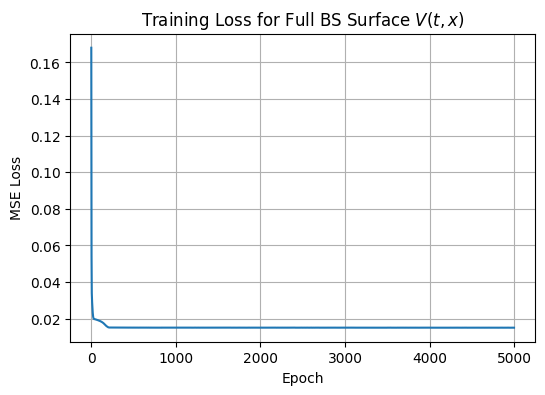

In [3]:
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss for Full BS Surface $V(t,x)$")
plt.grid(True)
plt.show()

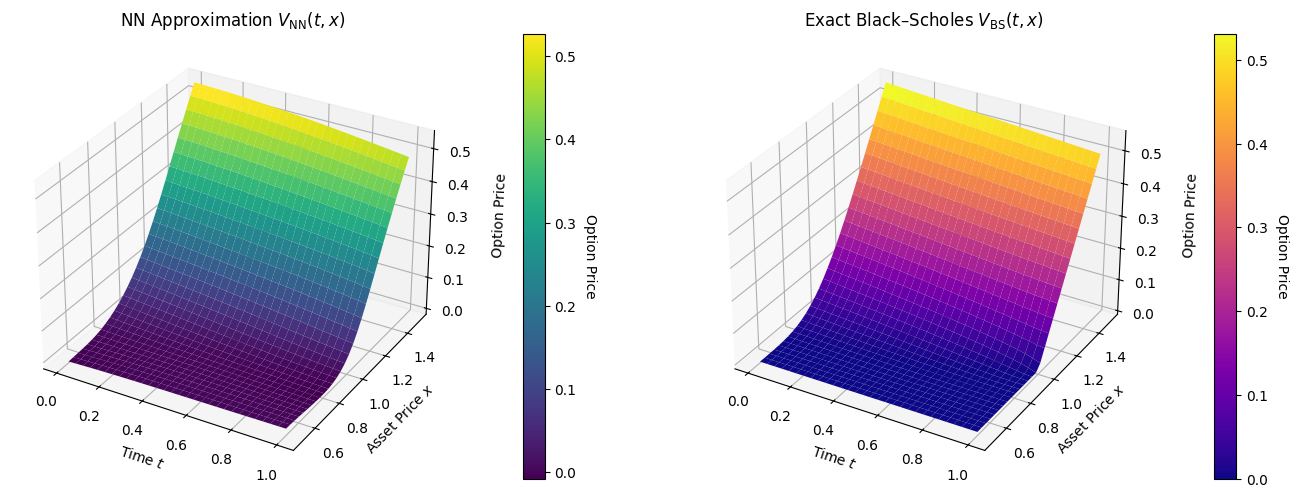

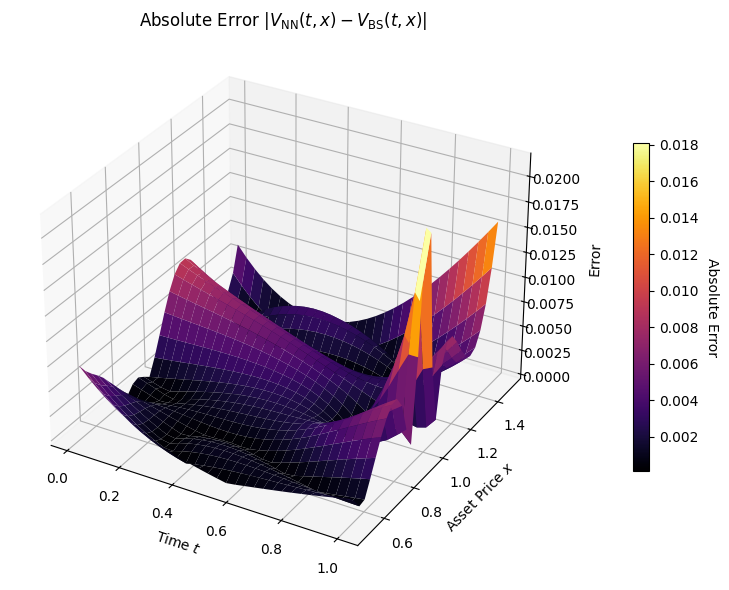

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st

# --- Assumed to already be defined:
# r, sigma, T, K, x_min, x_max, phi_model (trained neural network)

# --- Black–Scholes closed-form
def black_scholes_call(x, K, r, sigma, tau):
    x = np.maximum(x, 1e-10)
    tau = np.maximum(tau, 1e-10)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return x * st.norm.cdf(d1) - K * np.exp(-r * tau) * st.norm.cdf(d2)

# --- Create grid of (t, x) values
t_vals = np.linspace(0.01, T, 30)
x_vals = np.linspace(x_min, x_max, 30)
T_grid, X_grid = np.meshgrid(t_vals, x_vals)

# --- Flatten and build input to NN: [t, x]
TX = np.stack([T_grid.ravel(), X_grid.ravel()], axis=1)
tx_tensor = torch.tensor(TX, dtype=torch.float32)

# --- Predict using trained NN
phi_model_2d.eval()
with torch.no_grad():
    nn_preds = phi_model_2d(tx_tensor).numpy().flatten()

# --- Compute exact Black–Scholes prices
bs_prices = black_scholes_call(TX[:, 1], K, r, sigma, T - TX[:, 0])

# --- Reshape to 2D surfaces
nn_surface = nn_preds.reshape(len(x_vals), len(t_vals))
bs_surface = bs_prices.reshape(len(x_vals), len(t_vals))
error_surface = np.abs(nn_surface - bs_surface)


# --- FIRST FIGURE: NN + Black–Scholes side by side
fig = plt.figure(figsize=(14, 5))

# Plot 1: NN Approximation
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(T_grid, X_grid, nn_surface, cmap='viridis', edgecolor='none')
ax1.set_title("NN Approximation $V_{\\text{NN}}(t, x)$", fontsize=12)
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("Asset Price $x$")
ax1.set_zlabel("Option Price", labelpad=10)
cb1 = fig.colorbar(surf1, ax=ax1, pad=0.1)
cb1.set_label("Option Price", rotation=270, labelpad=15)

# Plot 2: Exact Black–Scholes
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(T_grid, X_grid, bs_surface, cmap='plasma', edgecolor='none')
ax2.set_title("Exact Black–Scholes $V_{\\text{BS}}(t, x)$", fontsize=12)
ax2.set_xlabel("Time $t$")
ax2.set_ylabel("Asset Price $x$")
ax2.set_zlabel("Option Price", labelpad=10)
cb2 = fig.colorbar(surf2, ax=ax2, pad=0.1)
cb2.set_label("Option Price", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# --- SECOND FIGURE: Error surface
fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')
surf3 = ax3.plot_surface(T_grid, X_grid, error_surface, cmap='inferno', edgecolor='none')
ax3.set_title("Absolute Error $|V_{\\text{NN}}(t, x) - V_{\\text{BS}}(t, x)|$", fontsize=12)
ax3.set_xlabel("Time $t$")
ax3.set_ylabel("Asset Price $x$")
ax3.set_zlabel("Error", labelpad=10)
cb3 = fig.colorbar(surf3, ax=ax3, shrink=0.6, pad=0.1)
cb3.set_label("Absolute Error", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

## Extracting a Slice from the Learned Surface: Fixed $t$, Varying $x$

In previous sections, we trained a 2D neural network to approximate the entire solution surface of the Black–Scholes partial differential equation:

$$
(t, x) \mapsto V(t, x)
$$

This allowed the model to learn how the option value evolves both in time and with respect to the underlying asset price. In this section, we extract a **1D slice** from that learned surface by **fixing the time variable $t$** and evaluating the network over a range of $x$ values.

This experiment serves two purposes:

- To visualize the cross-section $x \mapsto V(t, x)$ for a fixed $t$.
- To compare this slice with the predictions from a separate model trained directly at fixed $t$, i.e., a model that learns only the mapping:
  
  $$
  x \mapsto V(t, x)
  $$

Instead of relying on the Euler–Maruyama method to simulate the stochastic dynamics of the underlying asset, we use the **exact solution** to the Black–Scholes stochastic differential equation to compute $X_T$ from a given $X_t$:

$$
X_T = X_t \cdot \exp\left( \left(r - \frac{1}{2} \sigma^2\right)(T - t) + \sigma \sqrt{T - t} \cdot Z \right), \quad Z \sim \mathcal{N}(0, 1)
$$

We then evaluate the discounted payoff:

$$
V(t, x) = \mathbb{E}^{\mathbb{Q}} \left[ e^{-r(T - t)} \cdot \max(X_T - K, 0) \mid X_t = x \right]
$$

The resulting dataset is used to train a 1D neural network $\phi(x)$ at fixed time $t$, and we compare its predictions to the exact Black–Scholes formula. This validates whether a model trained on a time-slice is consistent with the slice extracted from the full 2D model.


Epoch 500/5000, Loss = 0.015403
Epoch 1000/5000, Loss = 0.015397
Epoch 1500/5000, Loss = 0.015395
Epoch 2000/5000, Loss = 0.015382
Epoch 2500/5000, Loss = 0.015406
Epoch 3000/5000, Loss = 0.015388
Epoch 3500/5000, Loss = 0.015383
Epoch 4000/5000, Loss = 0.015401
Epoch 4500/5000, Loss = 0.015393
Epoch 5000/5000, Loss = 0.015393


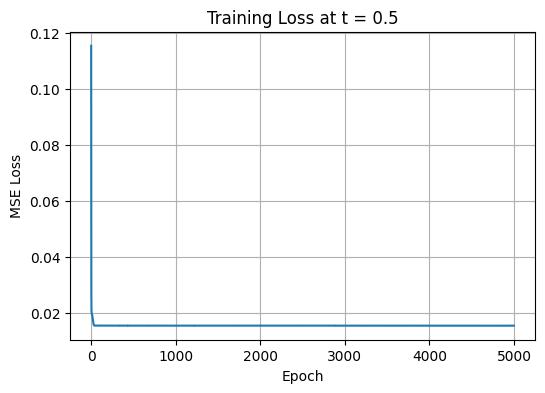

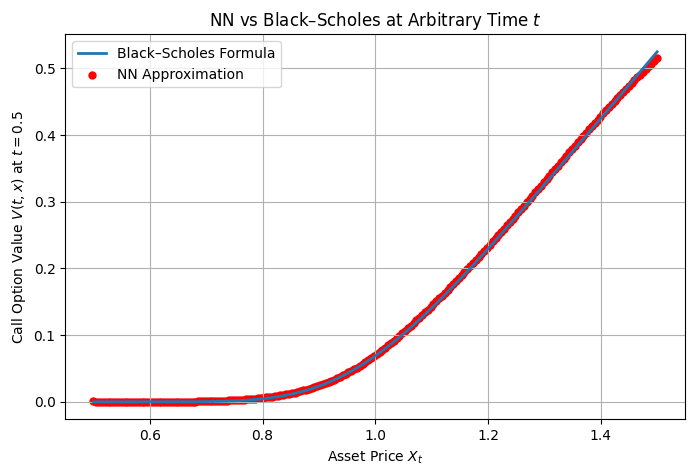

Mean Absolute Error : 0.001983
Max Absolute Error  : 0.009993


In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as st

# ----------------------------
# PARAMETERS
# ----------------------------
N = 50000           # Number of samples
r = 0.05            # Risk-free rate
sigma = 0.2         # Volatility
T = 1.0             # Maturity
K = 1.0             # Strike
x_min, x_max = 0.5, 1.5  # Range for X_t

t = 0.5             # Evaluation time (0 <= t < T)
assert 0 <= t < T

np.random.seed(123)

# ----------------------------
# STEP 1: SAMPLE X_t UNIFORMLY
# ----------------------------
Xt_array = np.random.uniform(low=x_min, high=x_max, size=N)

# ----------------------------
# STEP 2: USE CLOSED-FORM TO COMPUTE X_T GIVEN X_t
# ----------------------------
Z = np.random.normal(0.0, 1.0, size=N)  # Brownian increments
X_T_array = Xt_array * np.exp(
    sigma * np.sqrt(T - t) * Z + (r - 0.5 * sigma**2) * (T - t)
)

# ----------------------------
# STEP 3: DISCOUNTED PAYOFF
# ----------------------------
payoff = np.maximum(X_T_array - K, 0.0)
discounted_payoff = np.exp(-r * (T - t)) * payoff

# ----------------------------
# STEP 4: PREPARE DATA FOR TRAINING
# ----------------------------
Xt_tensor = torch.tensor(Xt_array, dtype=torch.float32).view(-1, 1)
y_tensor  = torch.tensor(discounted_payoff, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(Xt_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)

# ----------------------------
# STEP 5: DEFINE NEURAL NETWORK φ(x)
# ----------------------------
class BlackScholesNet(nn.Module):
    def __init__(self):
        super(BlackScholesNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

phi_model_1d = BlackScholesNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(phi_model_1d.parameters(), lr=1e-4)

# ----------------------------
# STEP 6: TRAINING LOOP
# ----------------------------
epochs = 5000
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for Xt_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = phi_model_1d(Xt_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")

# ----------------------------
# STEP 7: PLOT TRAINING LOSS
# ----------------------------
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title(f"Training Loss at t = {t}")
plt.grid(True)
plt.show()

# ----------------------------
# STEP 8: COMPARE TO BLACK–SCHOLES FORMULA
# ----------------------------
def black_scholes_call(x, K, r, sigma, T_minus_t):
    if T_minus_t <= 0 or x <= 0:
        return max(x - K, 0.0)
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * T_minus_t) / (sigma * np.sqrt(T_minus_t))
    d2 = d1 - sigma * np.sqrt(T_minus_t)
    return x * st.norm.cdf(d1) - K * np.exp(-r * T_minus_t) * st.norm.cdf(d2)

test_grid = np.linspace(x_min, x_max, 200)
phi_model_1d.eval()
with torch.no_grad():
    nn_preds = phi_model_1d(torch.tensor(test_grid, dtype=torch.float32).view(-1,1)).numpy().flatten()

bs_prices = np.array([black_scholes_call(x, K, r, sigma, T - t) for x in test_grid])

plt.figure(figsize=(8,5))
plt.plot(test_grid, bs_prices, label="Black–Scholes Formula", linewidth=2)
plt.scatter(test_grid, nn_preds, color="red", s=25, label="NN Approximation")
plt.xlabel("Asset Price $X_t$")
plt.ylabel(f"Call Option Value $V(t, x)$ at $t = {t}$")
plt.title("NN vs Black–Scholes at Arbitrary Time $t$")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# STEP 9: ERROR REPORTING
# ----------------------------
errors = np.abs(nn_preds - bs_prices)
print(f"Mean Absolute Error : {np.mean(errors):.6f}")
print(f"Max Absolute Error  : {np.max(errors):.6f}")


We now plot both the 1D neural network output trained at fixed time $t$ and the corresponding slice extracted from the 2D neural network surface. This comparison helps verify whether the full-surface model correctly captures the behavior along fixed-time cross-sections.


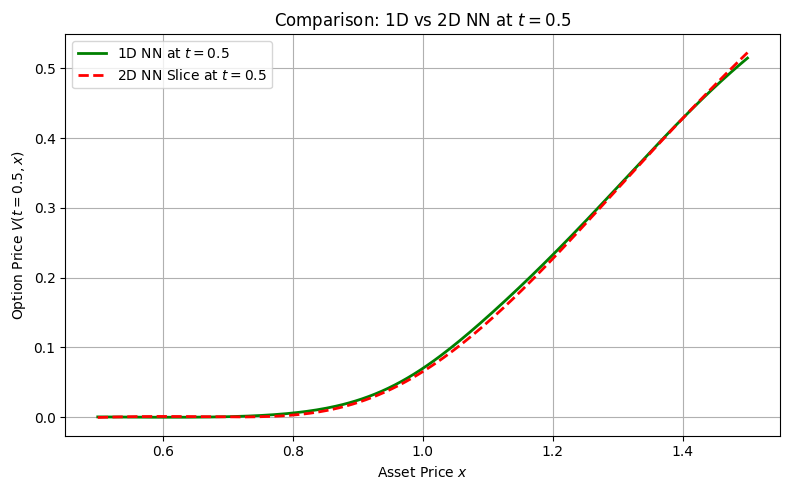

Mean Absolute Error: 0.003198
Max Absolute Error : 0.007984


In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# --- Parameters
t_fixed = 0.5
x_vals = np.linspace(x_min, x_max, 200)  # Make sure x_min, x_max are defined

# --- Create input tensors
x_tensor = torch.tensor(x_vals.reshape(-1, 1), dtype=torch.float32)
tx_tensor = torch.tensor(
    np.column_stack([np.full_like(x_vals, t_fixed), x_vals]), dtype=torch.float32
)

# --- Evaluate models
phi_model_1d.eval()
phi_model_2d.eval()
with torch.no_grad():
    pred_1d = phi_model_1d(x_tensor).numpy().flatten()
    pred_2d = phi_model_2d(tx_tensor).numpy().flatten()

# --- Compute error
abs_error = np.abs(pred_1d - pred_2d)
mean_error = np.mean(abs_error)
max_error = np.max(abs_error)

# --- Plot the results with color specification
plt.figure(figsize=(8,5))
plt.plot(x_vals, pred_1d, color='green', label="1D NN at $t=0.5$", linewidth=2)
plt.plot(x_vals, pred_2d, '--', color='red', label="2D NN Slice at $t=0.5$", linewidth=2)
plt.xlabel("Asset Price $x$")
plt.ylabel("Option Price $V(t=0.5, x)$")
plt.title("Comparison: 1D vs 2D NN at $t = 0.5$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print error statistics
print(f"Mean Absolute Error: {mean_error:.6f}")
print(f"Max Absolute Error : {max_error:.6f}")


## Comparison of Monte Carlo, FD Scheme, 1D and 2D Neural Networks.

In this section, we compare five different methods for computing the Black–Scholes option price at a fixed time $t = 0.5$ across a range of asset prices $x$:

- **1D Neural Network**: trained specifically to learn the mapping $x \mapsto V(t, x)$ for a fixed $t$.
- **2D Neural Network**: trained on the full solution surface $(t, x) \mapsto V(t, x)$, from which we extract a slice by fixing $t = 0.5$ to compare directly with the 1D model.
- **Monte Carlo Estimation**: using the exact simulation of $X_T$ conditioned on $X_t = x$ via the closed-form solution of the SDE.
- **Finite Difference Scheme**: using a Crank–Nicolson scheme with backward time-stepping
- **Exact Black–Scholes Formula**: the closed-form analytical solution.

This comprehensive comparison allows us to evaluate the accuracy of neural network-based approximations (both 1D and 2D) relative to classical numerical methods and the exact solution. All methods are evaluated along the slice $x \mapsto V(t=0.5, x)$ to ensure consistency.




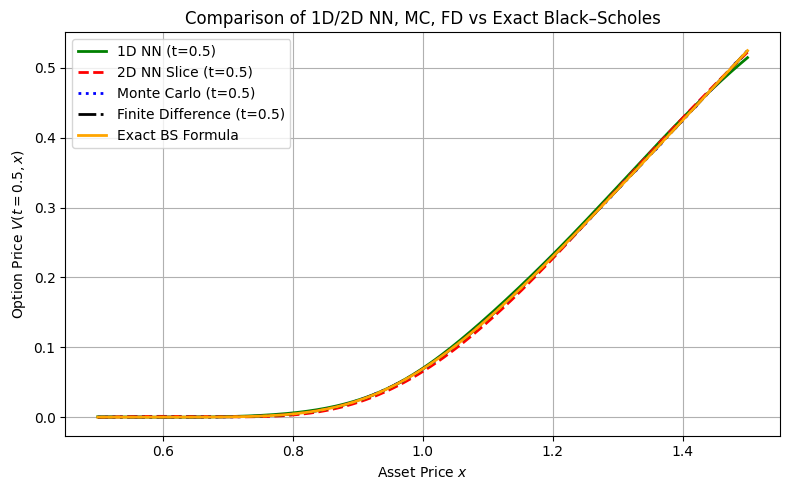

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.interpolate import interp1d

# --- Parameters ---
r = 0.05
sigma = 0.2
T = 1.0
K = 1.0
t_fixed = 0.5
x_min, x_max = 0.5, 1.5
x_vals = np.linspace(x_min, x_max, 200)

# --- 1. Neural Network Predictions ---
x_tensor = torch.tensor(x_vals.reshape(-1, 1), dtype=torch.float32)
tx_tensor = torch.tensor(np.column_stack([np.full_like(x_vals, t_fixed), x_vals]), dtype=torch.float32)

phi_model_1d.eval()
phi_model_2d.eval()
with torch.no_grad():
    pred_nn_1d = phi_model_1d(x_tensor).numpy().flatten()
    pred_nn_2d = phi_model_2d(tx_tensor).numpy().flatten()

# --- 2. Monte Carlo Estimation ---
def mc_estimate(x_vals, t_fixed, N_sim=100000):
    tau = T - t_fixed
    Z = np.random.normal(size=(len(x_vals), N_sim))
    X_T = x_vals[:, None] * np.exp((r - 0.5 * sigma**2) * tau + sigma * np.sqrt(tau) * Z)
    payoff = np.maximum(X_T - K, 0)
    discounted = np.exp(-r * tau) * np.mean(payoff, axis=1)
    return discounted

pred_mc = mc_estimate(x_vals, t_fixed)

# --- 3. Finite Difference (Stable + Interpolated) ---
def fd_black_scholes_call_clean(T, K, r, sigma, x_vals, t_eval, S_max=3.0, Nx=500, Nt=1000):
    from scipy.linalg import solve_banded

    dS = S_max / Nx
    dt = T / Nt

    S = np.linspace(0, S_max, Nx + 1)
    t_grid = np.linspace(0, T, Nt + 1)

    M = Nx - 1  # number of interior points

    # Coefficients for interior points
    Si = S[1:-1]

    alpha = 0.25 * dt * (sigma**2 * Si**2 / dS**2 - r * Si / dS)
    beta  = -0.5 * dt * (sigma**2 * Si**2 / dS**2 + r)
    gamma = 0.25 * dt * (sigma**2 * Si**2 / dS**2 + r * Si / dS)

    # Matrix A (implicit)
    A_diag  = 1 - beta
    A_upper = -gamma[:-1]
    A_lower = -alpha[1:]

    # Matrix B (explicit)
    B_diag  = 1 + beta
    B_upper = gamma[:-1]
    B_lower = alpha[1:]

    # Banded form of A
    ab_A = np.zeros((3, M))
    ab_A[0, 1:]  = A_upper
    ab_A[1, :]   = A_diag
    ab_A[2, :-1] = A_lower

    # Initialize solution matrix
    V = np.zeros((Nt + 1, Nx + 1))
    V[-1, :] = np.maximum(S - K, 0.0)
    V[:, 0] = 0.0
    V[:, -1] = S_max - K * np.exp(-r * (T - t_grid))

    # Backward time stepping
    for n in range(Nt - 1, -1, -1):
        V_next = V[n + 1, 1:-1]  # shape (M,)

        rhs = B_diag * V_next
        rhs[1:]  += B_lower * V_next[:-1]
        rhs[:-1] += B_upper * V_next[1:]

        # boundary correction (right only)
        V_right_next = V[n + 1, -1]
        V_right_now  = S_max - K * np.exp(-r * (T - t_grid[n]))
        rhs[-1] +=  gamma[-1] * V_right_next
        rhs[-1] -= -gamma[-1] * V_right_now

        V[n, 1:-1] = solve_banded((1, 1), ab_A, rhs)
        V[n, -1]   = V_right_now

    # Extract and interpolate solution at t_eval
    t_idx = int(round((T - t_eval) / dt))
    V_interp = interp1d(S, V[t_idx, :], kind='cubic', bounds_error=False, fill_value="extrapolate")
    return V_interp(x_vals)

pred_fd = fd_black_scholes_call_clean(T, K, r, sigma, x_vals, t_fixed)

# --- 4. Exact Black–Scholes Formula ---
def bs_exact_call(x, K, r, sigma, tau):
    d1 = (np.log(x / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return x * st.norm.cdf(d1) - K * np.exp(-r * tau) * st.norm.cdf(d2)

pred_exact = bs_exact_call(x_vals, K, r, sigma, T - t_fixed)

# --- Plot All Methods ---
plt.figure(figsize=(8, 5))

plt.plot(x_vals, pred_nn_1d, color='green', label="1D NN (t=0.5)", linewidth=2)
plt.plot(x_vals, pred_nn_2d, '--', color='red', label="2D NN Slice (t=0.5)", linewidth=2)
plt.plot(x_vals, pred_mc, ':', color='blue', label="Monte Carlo (t=0.5)", linewidth=2)
plt.plot(x_vals, pred_fd, '-.', color='black', label="Finite Difference (t=0.5)", linewidth=2)
plt.plot(x_vals, pred_exact, '-', color='orange', label="Exact BS Formula", linewidth=2)

plt.xlabel("Asset Price $x$")
plt.ylabel("Option Price $V(t=0.5, x)$")
plt.title("Comparison of 1D/2D NN, MC, FD vs Exact Black–Scholes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


An explicit FD scheme requiring CFL conditions.

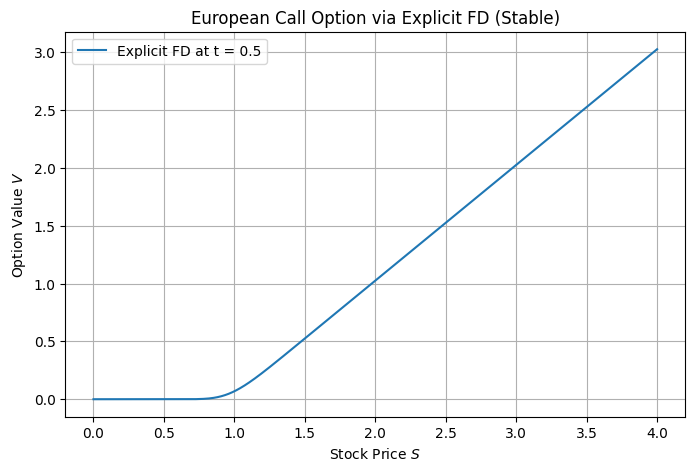

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.05
sigma = 0.2
K = 1.0
T = 1.0
t_eval = 0.5
S_max = 4.0
Nx = 600

# CFL-stable time step
dt_stable = 1 / (sigma**2 * Nx**2)
Nt = int(T / dt_stable) + 1
dt = T / Nt

# Grids
dS = S_max / Nx
S = np.linspace(0, S_max, Nx+1)
t = np.linspace(0, T, Nt+1)

# Initialize option matrix
V = np.zeros((Nt+1, Nx+1))

# Terminal condition (European call)
V[-1, :] = np.maximum(S - K, 0)

# Boundary conditions
V[:, 0] = 0
V[:, -1] = S_max - K * np.exp(-r * (T - t))

# Time stepping
for n in reversed(range(Nt)):
    for i in range(1, Nx):
        Si = S[i]
        a = 0.5 * dt * (sigma**2 * Si**2 / dS**2 - r * Si / dS)
        b = 1 - dt * (sigma**2 * Si**2 / dS**2 + r)
        c = 0.5 * dt * (sigma**2 * Si**2 / dS**2 + r * Si / dS)
        V[n, i] = a * V[n+1, i-1] + b * V[n+1, i] + c * V[n+1, i+1]

# Extract solution at t = t_eval
t_idx = int((T - t_eval) / dt)
V_eval_explicit = V[t_idx, :]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(S, V_eval_explicit, label="Explicit FD at t = 0.5")
plt.xlabel("Stock Price $S$")
plt.ylabel("Option Value $V$")
plt.title("European Call Option via Explicit FD (Stable)")
plt.grid(True)
plt.legend()
plt.show()


The Crank-Nicolson implementation

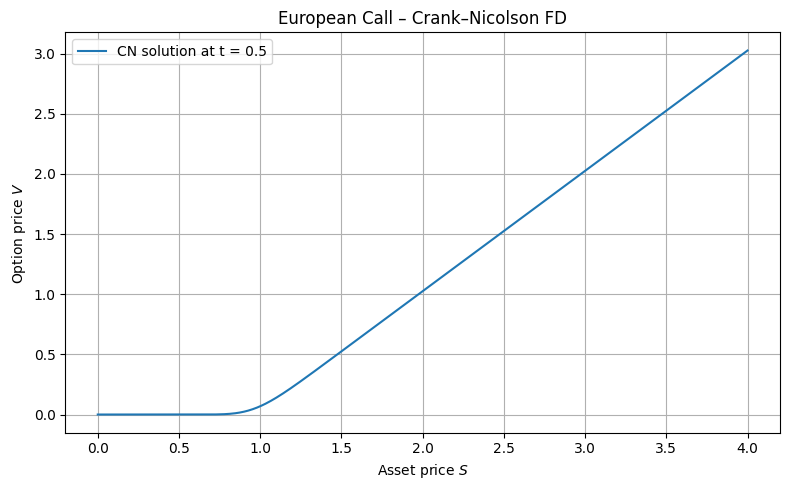

V(t=0.5, S=1.0) ≈ 0.068872


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# ---------------------------------------------------------------------
# 1. Parameters and grids
# ---------------------------------------------------------------------
r, sigma = 0.05, 0.20
K, T     = 1.0, 1.0
S_max    = 4.0
Nx, Nt   = 600, 1000
t_eval   = 0.5

dS = S_max / Nx
dt = T / Nt

S = np.linspace(0.0, S_max, Nx + 1)      # S[0] … S[Nx]
t = np.linspace(0.0, T,   Nt + 1)

M = Nx - 1                                # interior spatial points

# ---------------------------------------------------------------------
# 2. Crank–Nicolson coefficients
# ---------------------------------------------------------------------
Si     = S[1:-1]                          # length M
alpha  = 0.25 * dt * (sigma**2 * Si**2 / dS**2 - r * Si / dS)
beta   = -0.5 * dt * (sigma**2 * Si**2 / dS**2 + r)
gamma  = 0.25 * dt * (sigma**2 * Si**2 / dS**2 + r * Si / dS)

A_diag  = 1 - beta                        # length M
A_upper = -gamma[:-1]                     # length M-1   <── fixed
A_lower = -alpha[1:]                      # length M-1   <── fixed

B_diag  = 1 + beta                        # length M
B_upper =  gamma[:-1]                     # length M-1   <── fixed
B_lower =  alpha[1:]                      # length M-1   <── fixed

# pack A in (l,u) = (1,1) banded form for solve_banded
ab_A = np.zeros((3, M))
ab_A[0, 1:]  = A_upper          # super-diag
ab_A[1, :]   = A_diag           # main diag
ab_A[2, :-1] = A_lower          # sub-diag

# ---------------------------------------------------------------------
# 3. Allocate solution array and set terminal / BCs
# ---------------------------------------------------------------------
V = np.zeros((Nt + 1, Nx + 1))
V[-1, :] = np.maximum(S - K, 0.0)                 # terminal payoff
V[:, 0]  = 0.0                                    # S = 0 boundary
V[:, -1] = S_max - K * np.exp(-r * (T - t))       # S = S_max boundary

# ---------------------------------------------------------------------
# 4. Backward time-march
# ---------------------------------------------------------------------
for n in range(Nt - 1, -1, -1):                         # Nt-1 … 0
    V_next = V[n + 1, 1:-1]                             # length M

    rhs = B_diag * V_next
    rhs[1:]  += B_lower * V_next[:-1]
    rhs[:-1] += B_upper * V_next[1:]

    V_right_next = V[n + 1, -1]                         # known at step n+1
    V_right_now  = S_max - K * np.exp(-r * (T - t[n]))  # analytic BC, t_n

    rhs[-1] +=  gamma[-1] * V_right_next   # explicit (B) contribution
    rhs[-1] -= -gamma[-1] * V_right_now    # implicit (A) term moved RHS

    V[n, 1:-1] = solve_banded((1, 1), ab_A, rhs)
    V[n,  -1]  = V_right_now               # refresh right boundary

# ---------------------------------------------------------------------
# 5. Extract solution slice and plot
# ---------------------------------------------------------------------
t_idx  = int(round((T - t_eval) / dt))
V_eval = V[t_idx, :]

plt.figure(figsize=(8, 5))
plt.plot(S, V_eval, label=f'CN solution at t = {t_eval}')
plt.xlabel('Asset price $S$')
plt.ylabel('Option price $V$')
plt.title('European Call – Crank–Nicolson FD')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

S0 = 1.0
print(f'V(t={t_eval}, S={S0}) ≈ {np.interp(S0, S, V_eval):.6f}')


# Future Work:

## Objective: Neural Network Approximation of Multi-Asset Black–Scholes PDE

In this notebook, we aim to approximate the solution $V(t, x)$ of the high-dimensional Black–Scholes partial differential equation using a neural network. Specifically, we consider the case of a **basket option** on $d$ assets, where the underlying dynamics follow a $d$-dimensional geometric Brownian motion under the risk-neutral measure.

Because the dimensionality makes classical numerical methods (like finite differences) computationally expensive or intractable, we employ a **fully connected neural network** to approximate the conditional expectation arising from the Feynman–Kac representation:

$$
V(t, x) = \mathbb{E}^{\mathbb{Q}} \left[ e^{-r(T - t)} f(X_T) \mid X_t = x \right]
$$

where $X_t \in \mathbb{R}^d$ is the vector of asset prices at time $t$, and $f(X_T)$ is the basket payoff at maturity.

The approach involves generating synthetic data using exact simulations of $X_T$ (under GBM), computing the corresponding discounted payoffs, and training a neural network on $(t, x_1, \dots, x_d) \mapsto V(t, x)$.

---

## Summary of Steps

| Step       | Description |
|------------|-------------|
| **Data**   | Simulate sample paths of $d$-dimensional geometric Brownian motion (GBM) from time $t$ to $T$ |
| **Target** | Compute the discounted payoff of a European basket call option based on the simulated terminal values $X_T$ |
| **Model**  | Define and train a fully connected neural network using $(t, x_1, \dots, x_d)$ as input features |
| **Output** | Learn the solution $V(t, x)$ of the Black–Scholes PDE for the multi-asset basket option |
| **Visual** | For $d = 2$, plot the learned surface $V(t, x_1, x_2)$ at fixed $t$ to qualitatively assess the network’s approximation quality |


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from mpl_toolkits.mplot3d import Axes3D

# Set seeds
np.random.seed(42)
torch.manual_seed(42)

# ---------------------------------------
# PARAMETERS
# ---------------------------------------
N = 30000        # Number of training samples
d = 2            # Number of assets
r = 0.05         # Risk-free rate
sigma = 0.2      # Volatility
T = 1.0          # Maturity
K = 1.0          # Strike
x_min, x_max = 0.5, 1.5
M = 100          # Euler–Maruyama steps
batch_size = 512
epochs = 3000

# Basket weights
weights = np.ones(d) / d

# ---------------------------------------
# DATA GENERATION
# ---------------------------------------
# Step 1: Sample (t, x1, ..., xd)
t_array = np.random.uniform(0.0, T, size=N)
x_array = np.random.uniform(x_min, x_max, size=(N, d))
dt_array = (T - t_array) / M  # (N,)

# Step 2: Simulate correlated GBM from t to T using Euler–Maruyama
X_T = x_array.copy()
for _ in range(M):
    dW = np.random.normal(0, 1, size=(N, d)) * np.sqrt(dt_array[:, None])
    X_T += r * X_T * dt_array[:, None] + sigma * X_T * dW

# Step 3: Basket payoff and discount
basket = X_T @ weights
payoff = np.maximum(basket - K, 0.0)
discounted = np.exp(-r * (T - t_array)) * payoff

# Step 4: PyTorch conversion
X_input = np.hstack([t_array[:, None], x_array])  # shape: (N, d+1)
X_tensor = torch.tensor(X_input, dtype=torch.float32)
y_tensor = torch.tensor(discounted, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# ---------------------------------------
# MODEL
# ---------------------------------------
class MultiDimBSNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.model(x)

phi_model = MultiDimBSNet(d + 1)
optimizer = optim.Adam(phi_model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

# ---------------------------------------
# TRAINING
# ---------------------------------------
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        preds = phi_model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(loader)
    loss_history.append(avg_loss)
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {avg_loss:.6f}")

# ---------------------------------------
# PLOT TRAINING LOSS
# ---------------------------------------
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

# ---------------------------------------
# EVALUATION AND 3D VISUALIZATION (d=2)
# ---------------------------------------
# Fix t and evaluate over (x1, x2)
t0 = 0.5
x1_vals = np.linspace(x_min, x_max, 40)
x2_vals = np.linspace(x_min, x_max, 40)
X1_grid, X2_grid = np.meshgrid(x1_vals, x2_vals)
grid_inputs = np.stack([np.full_like(X1_grid, t0), X1_grid, X2_grid], axis=-1).reshape(-1, d+1)

with torch.no_grad():
    model_inputs = torch.tensor(grid_inputs, dtype=torch.float32)
    predictions = phi_model(model_inputs).numpy().reshape(X1_grid.shape)

# Plot 3D surface
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_grid, X2_grid, predictions, cmap='viridis')
ax.set_title(f"NN Approximation $V(t={t0}, x_1, x_2)$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("Option Price")
plt.tight_layout()
plt.show()
